In [1]:
from kaqt.backtest.data import quotes_data, trades_data, clean_quotes, create_mid_quotes, create_spreads
import pandas as pd
import numpy as np

In [22]:
pd.options.display.mpl_style = 'default'
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 10

In [3]:
%matplotlib inline

In [4]:
pd.options.display.notebook_repr_html = False

In [11]:
ed_z5 = quotes_data('EDZ5', date='2015-06-11')

In [12]:
ed_h6 = quotes_data('EDH6', date='2015-06-11')

In [13]:
ed_z5 = clean_quotes(ed_z5)
ed_z5 = ed_z5.ffill()

In [17]:
ed_h6 = clean_quotes(ed_h6)
ed_h6 = ed_h6.ffill()

In [18]:
ed_z5.tail()

                              Bid  BidSize     Ask  AskSize
DateTime                                                   
2015-06-11 23:59:06.003954  99.35      231  99.355     1444
2015-06-11 23:59:06.107399  99.35      238  99.355     1444
2015-06-11 23:59:06.129872  99.35      242  99.355     1444
2015-06-11 23:59:43.417972  99.35      262  99.355     1444
2015-06-11 23:59:43.417972  99.35      267  99.355     1444

In [19]:
ed_h6.tail()

                               Bid  BidSize    Ask  AskSize
DateTime                                                   
2015-06-11 23:59:06.161112  99.145      477  99.15      468
2015-06-11 23:59:08.268554  99.145      502  99.15      468
2015-06-11 23:59:12.285159  99.145      505  99.15      468
2015-06-11 23:59:43.405252  99.145      525  99.15      468
2015-06-11 23:59:43.405252  99.145      530  99.15      468

In [20]:
ed_z5_mid = create_mid_quotes(ed_z5)

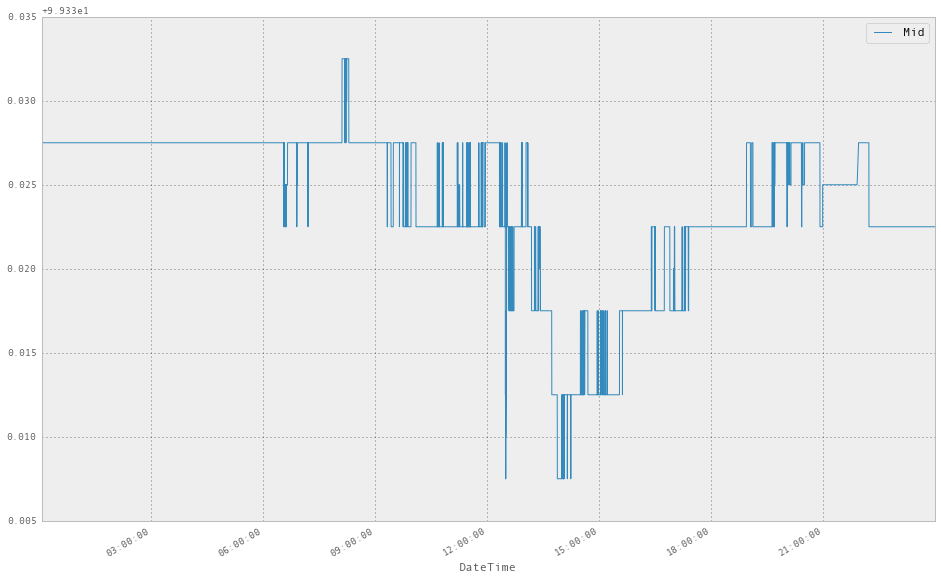

In [23]:
ed_z5_mid.plot()

In [24]:
ed_h6_mid = create_mid_quotes(ed_h6)

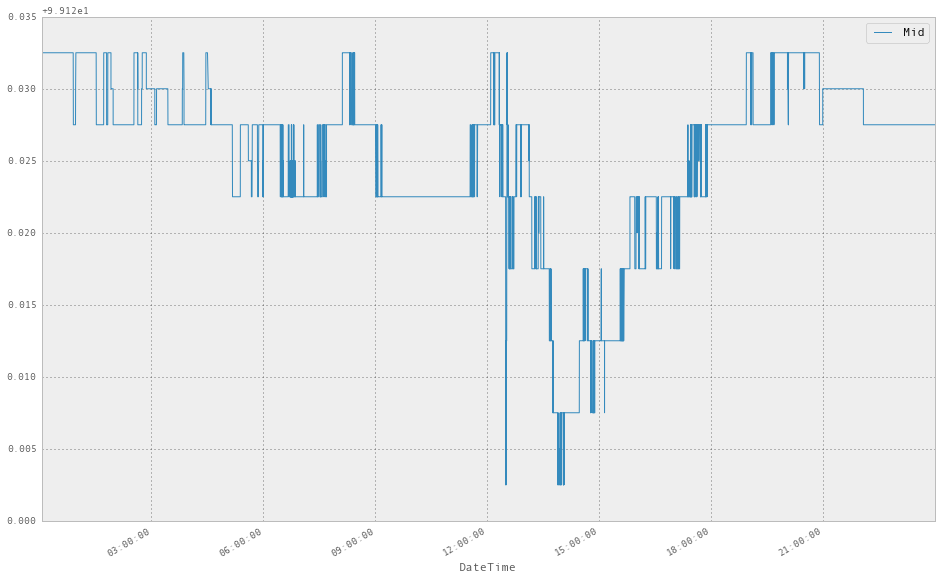

In [25]:
ed_h6_mid.plot()

In [26]:
merged_prices = ed_z5_mid.join(ed_h6_mid, lsuffix='_EDZ5', rsuffix='_EDH6')

In [27]:
merged_prices = merged_prices.ffill()

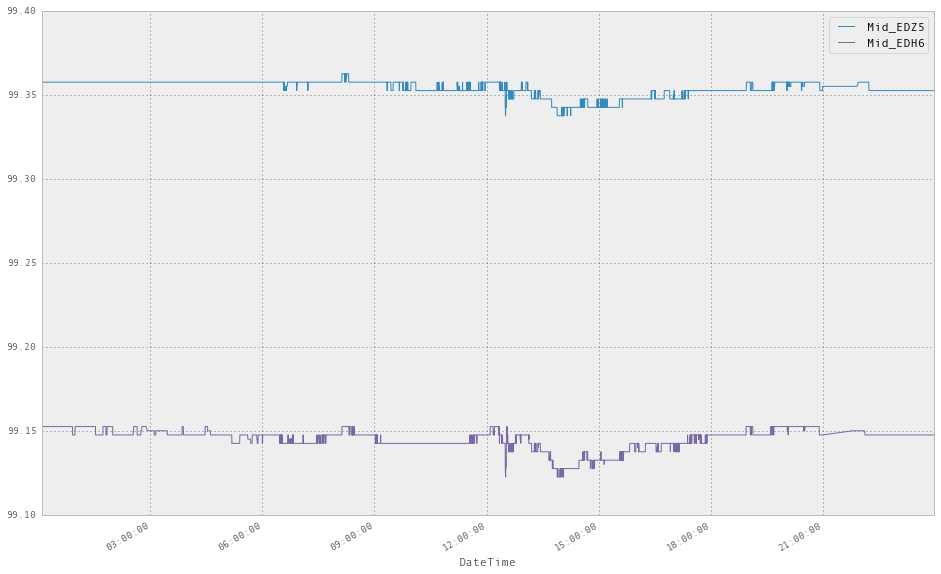

In [28]:
merged_prices.plot()

In [29]:
spread_series = create_spreads(ed_z5, ed_h6)

In [30]:
spread_series.tail()

                            Bid  BidSize   Ask  AskSize
DateTime                                               
2015-06-11 23:59:06.003954  0.2      231  0.21      470
2015-06-11 23:59:06.107399  0.2      238  0.21      470
2015-06-11 23:59:06.129872  0.2      242  0.21      470
2015-06-11 23:59:43.417972  0.2      262  0.21      470
2015-06-11 23:59:43.417972  0.2      267  0.21      470

In [31]:
merged_prices.tail()

                            Mid_EDZ5  Mid_EDH6
DateTime                                      
2015-06-11 23:59:06.003954   99.3525   99.1475
2015-06-11 23:59:06.107399   99.3525   99.1475
2015-06-11 23:59:06.129872   99.3525   99.1475
2015-06-11 23:59:43.417972   99.3525   99.1475
2015-06-11 23:59:43.417972   99.3525   99.1475

In [35]:
spread_mid = create_mid_quotes(spread_series)

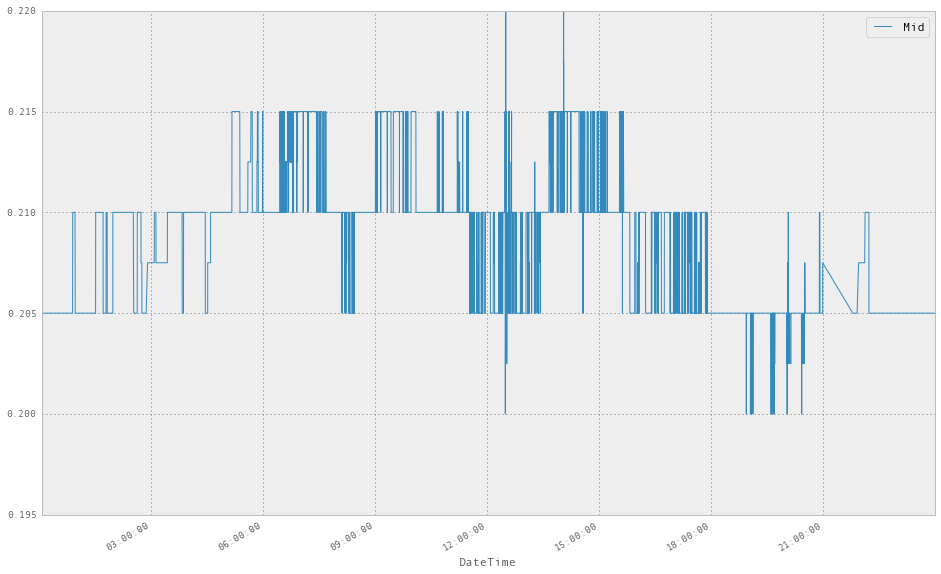

In [36]:
spread_mid.plot()

In [37]:
from kaqt.backtest.metrics import PivotPoints

In [49]:
ed_h6_hloc = ed_h6_mid.resample('Min', kind='ohlc')

In [51]:
ed_h6_hloc = ed_h6_hloc.ffill()

In [52]:
ed_h6_hloc.tail()

                      Mid
DateTime                 
2015-06-11 23:55  99.1475
2015-06-11 23:56  99.1475
2015-06-11 23:57  99.1475
2015-06-11 23:58  99.1475
2015-06-11 23:59  99.1475